In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toyota-cardata/Toyota.csv


### Name: Sheetal Patil
# Title: Prediction of the Price of Used Toyota Corolla Cars

### Business Understanding:

A large Toyota car dealership offers purchasers of new Toyota cars the option to buy their used car as part of a trade-in. In particular, a new promotion promises to pay high prices for used Toyota Corolla cars for purchasers of a new car. The dealer then sells the used car for a small profit. To ensure a reasonable profit, the dealer needs to be able to predict the price that the dealership will get for the used cars. For that reason, data were collected on all previous sales of used Toyota Corollas at the dealership. The data include the sales price and other information on the car, such as its age, mileage, fuel type, and engine size.

### Data Understanding

In [2]:
#import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder 
warnings.filterwarnings('ignore')

Data were collected on all the previous sales of used toyota cars. Predict the price for used cars.

In [3]:
# Load dataset
data = pd.read_csv('/kaggle/input/toyota-cardata/Toyota.csv')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


**Feature Description**  
Model -- model of the car  
Price -- Offer Price in EUROs  
Age_08_04 -- Age in months as in August 2004  
Mfg_Month -- Manufacturing month (1-12)  
Mfg_Year -- Manufacturing Year  
KM -- Accumulated Kilometers on odometer  
Fuel_Type -- Fuel Type (Petrol, Diesel, CNG)  
HP -- Horse Power  
Met_Color -- Metallic Color? (Yes=1, No=0)  
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)  
Automatic -- Automatic ( (Yes=1, No=0)  
cc -- Cylinder Volume in cubic centimeters  
Doors -- Number of doors  
Cylinders -- Number of cylinders  
Gears -- Number of gear positions  
Quarterly_Tax -- Quarterly road tax in EUROs  
Weight -- Weight in Kilograms  
Mfr_Guarantee -- Within Manufacturer's Guarantee period (Yes=1, No=0)  
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee (Yes=1, No=0)  
Guarantee_Period -- Guarantee period in months  
ABS -- Anti-Lock Brake System (Yes=1, No=0)  
Airbag_1 -- Driver_Airbag (Yes=1, No=0)  
Airbag_2 -- Passenger Airbag (Yes=1, No=0)  
Airco -- Airconditioning (Yes=1, No=0)  
Automatic_airco -- Automatic Airconditioning (Yes=1, No=0)  
Boardcomputer -- Boardcomputer (Yes=1, No=0)  
CD_Player -- CD Player (Yes=1, No=0)  
Central_Lock -- Central Lock (Yes=1, No=0)  
Powered_Windows -- Powered Windows (Yes=1, No=0)  
Power_Steering -- Power Steering (Yes=1, No=0)  
Radio -- Radio (Yes=1, No=0)  
Mistlamps -- Mistlamps (Yes=1, No=0)  
Sport_Model -- Sport Model (Yes=1, No=0)  
Backseat_Divider -- Backseat Divider (Yes=1, No=0)  
Metallic_Rim --Metallic Rim (Yes=1, No=0)  
Radio_cassette -- Radio Cassette (Yes=1, No=0)  
Tow_Bar -- Tow Bar (Yes=1, No=0)  

In [4]:
#this gives total no. of rows and no. of columns
data.shape

(1436, 38)

**Data Manupalation**

In [5]:
#Removing the other columns
Data = data[["Price","Age_08_04","KM","Fuel_Type","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
Data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,Diesel,90.0,2000,3,5,210,1165
1,13750,23,72937,Diesel,90.0,2000,3,5,210,1165
2,13950,24,41711,Diesel,90.0,2000,3,5,210,1165
3,14950,26,48000,Diesel,90.0,2000,3,5,210,1165
4,13750,30,38500,Diesel,90.0,2000,3,5,210,1170


In [6]:
#renaming the column names
data1= Data.rename({'Age_08_04':'Age','cc':'CC','Fuel_Type':'FT','Quarterly_Tax':'QT'}, axis = 1)
data1.head()

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,Diesel,90.0,2000,3,5,210,1165
1,13750,23,72937,Diesel,90.0,2000,3,5,210,1165
2,13950,24,41711,Diesel,90.0,2000,3,5,210,1165
3,14950,26,48000,Diesel,90.0,2000,3,5,210,1165
4,13750,30,38500,Diesel,90.0,2000,3,5,210,1170


**Needed Columns for prediction:**

**Price:** Offer Price in EUROs  
**Age:** Age in years  
**KM:** Accumulated Kilometers on odometer  
**FT:** Fuel Type (Diesel, Petrol, CNG)  
**HP:** Horse Power  
**CC:** Cylinder Volume in cubic centimeters  
**Doors:** Number of doors  
**Gears:** Number of gear positions  
**QT:** Quarterly road tax in EUROs  
**Weight:** Weight in Kilograms  

In [7]:
#updated no. of rows and no. of columns
data1.shape

(1436, 10)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1436 non-null   int64  
 1   Age     1436 non-null   int64  
 2   KM      1436 non-null   int64  
 3   FT      1436 non-null   object 
 4   HP      1434 non-null   float64
 5   CC      1436 non-null   int64  
 6   Doors   1436 non-null   int64  
 7   Gears   1436 non-null   int64  
 8   QT      1436 non-null   int64  
 9   Weight  1436 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 112.3+ KB


Here all columns are having 1436 non null values except HP having 1434 non null values.  
Also all are of int type except HP is of float and FT is of object type.

**Summary Statistics**

In [9]:
#data analysis for numerical data
data1.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1434.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.513250,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.987975,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [10]:
#data analysis for categorical data
data1.describe(include= object)

,FT
count,1436
unique,3
top,Petrol
freq,1264


<Axes: xlabel='FT'>

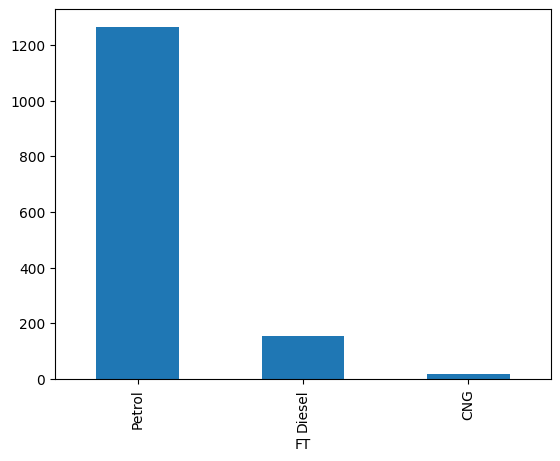

In [11]:
data1['FT'].value_counts().plot.bar()

In [12]:
# No of unique values of each feature in dataset.
data1.nunique()

Price      236
Age         77
KM        1263
FT           3
HP          12
CC          13
Doors        4
Gears        4
QT          13
Weight      59
dtype: int64

In [13]:
#Duplicated data
data1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [14]:
#Count of Duplicated data
data1[data1.duplicated()]

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,Diesel,116.0,2000,5,5,234,1320


In [15]:
#delete the duplicate row
data2= data1.drop_duplicates()
#the duplicate row is seen deleted
data2.iloc[105:115]

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
105,16950,19,13748,Petrol,97.0,1400,3,5,85,1100
106,18800,14,11500,Petrol,110.0,1600,3,5,69,1045
107,17450,17,10000,Petrol,97.0,1400,3,5,85,1100
108,17950,20,7187,Petrol,110.0,1600,3,5,85,1105
109,32500,4,1,Diesel,116.0,2000,5,5,283,1480
110,31000,4,4000,Diesel,116.0,2000,5,5,283,1480
111,31275,4,1500,Diesel,116.0,2000,5,5,283,1480
112,24950,8,13253,Diesel,116.0,2000,5,5,234,1320
114,22950,7,10000,Diesel,116.0,2000,5,5,234,1270
115,24990,8,6000,Diesel,90.0,2000,5,5,234,1280


In [16]:
#reassign the row number by reset index
data2= data2.reset_index()
data2.iloc[105:115]

,index,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
105,105,16950,19,13748,Petrol,97.0,1400,3,5,85,1100
106,106,18800,14,11500,Petrol,110.0,1600,3,5,69,1045
107,107,17450,17,10000,Petrol,97.0,1400,3,5,85,1100
108,108,17950,20,7187,Petrol,110.0,1600,3,5,85,1105
109,109,32500,4,1,Diesel,116.0,2000,5,5,283,1480
110,110,31000,4,4000,Diesel,116.0,2000,5,5,283,1480
111,111,31275,4,1500,Diesel,116.0,2000,5,5,283,1480
112,112,24950,8,13253,Diesel,116.0,2000,5,5,234,1320
113,114,22950,7,10000,Diesel,116.0,2000,5,5,234,1270
114,115,24990,8,6000,Diesel,90.0,2000,5,5,234,1280


In [17]:
#Drop the original index
data2= data2.drop(['index'], axis=1)
data2

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,Diesel,90.0,2000,3,5,210,1165
1,13750,23,72937,Diesel,90.0,2000,3,5,210,1165
2,13950,24,41711,Diesel,90.0,2000,3,5,210,1165
3,14950,26,48000,Diesel,90.0,2000,3,5,210,1165
4,13750,30,38500,Diesel,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86.0,1300,3,5,69,1025
1431,10845,72,19000,Petrol,86.0,1300,3,5,69,1015
1432,8500,71,17016,Petrol,86.0,1300,3,5,69,1015
1433,7250,70,16916,Petrol,86.0,1300,3,5,69,1015


In [18]:
#updated no. of rows and no. of columns
data2.shape

(1435, 10)

In [19]:
data2.isnull().sum()

Price     0
Age       0
KM        0
FT        0
HP        2
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

**Outlier Detection**

<Axes: >

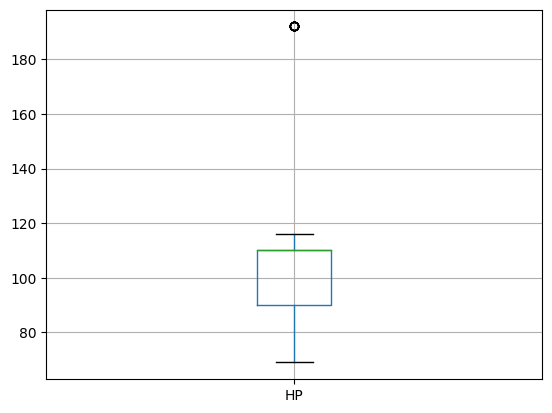

In [20]:
#boxplot
data2.boxplot(column=['HP'])
#In the upper extreme we have outliers

In [21]:
data2[data2.HP>180]

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
8,21500,27,19700,Petrol,192.0,1800,3,5,100,1185
10,20950,25,31461,Petrol,192.0,1800,3,6,100,1185
11,19950,22,43610,Petrol,192.0,1800,3,6,100,1185
12,19600,25,32189,Petrol,192.0,1800,3,6,100,1185
13,21500,31,23000,Petrol,192.0,1800,3,6,100,1185
14,22500,32,34131,Petrol,192.0,1800,3,6,100,1185
15,22000,28,18739,Petrol,192.0,1800,3,6,100,1185
16,22750,30,34000,Petrol,192.0,1800,3,5,100,1185
49,21950,31,64982,Petrol,192.0,1800,5,6,100,1195
53,21950,27,49866,Petrol,192.0,1800,5,5,100,1195


We check outliers for HP as HP has two null values. We need to replace those null values by mean or median of data. If data has outliers then mean also get influenced by outlier. So we will use median in that case to replace null value.

In [22]:
#null values showing
data2[data2.isnull().any(axis=1)]

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
7,18600,30,75889,Diesel,NaN,2000,3,5,210,1245
38,15750,32,25329,Petrol,NaN,1400,3,5,85,1100


In [23]:
#Mean Imputation
median= data2['HP'].median()
median

110.0

In [24]:
#HP has 2 missing values, here we are imputing missing values with mean of HP
data2['HP']= data2['HP'].fillna(median)
data2.head(10)

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,Diesel,90.0,2000,3,5,210,1165
1,13750,23,72937,Diesel,90.0,2000,3,5,210,1165
2,13950,24,41711,Diesel,90.0,2000,3,5,210,1165
3,14950,26,48000,Diesel,90.0,2000,3,5,210,1165
4,13750,30,38500,Diesel,90.0,2000,3,5,210,1170
5,12950,32,61000,Diesel,90.0,2000,3,5,210,1170
6,16900,27,94612,Diesel,90.0,2000,3,5,210,1245
7,18600,30,75889,Diesel,110.0,2000,3,5,210,1245
8,21500,27,19700,Petrol,192.0,1800,3,5,100,1185
9,12950,23,71138,Diesel,69.0,1900,3,5,185,1105


In [25]:
#null values of HP are replaced by median of HP
data2[data2.index.isin([7,38])]

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
7,18600,30,75889,Diesel,110.0,2000,3,5,210,1245
38,15750,32,25329,Petrol,110.0,1400,3,5,85,1100


In [26]:
#checking for null value
data2.isnull().sum()
#now there is no null value

Price     0
Age       0
KM        0
FT        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

**Exploratory Data Analysis**

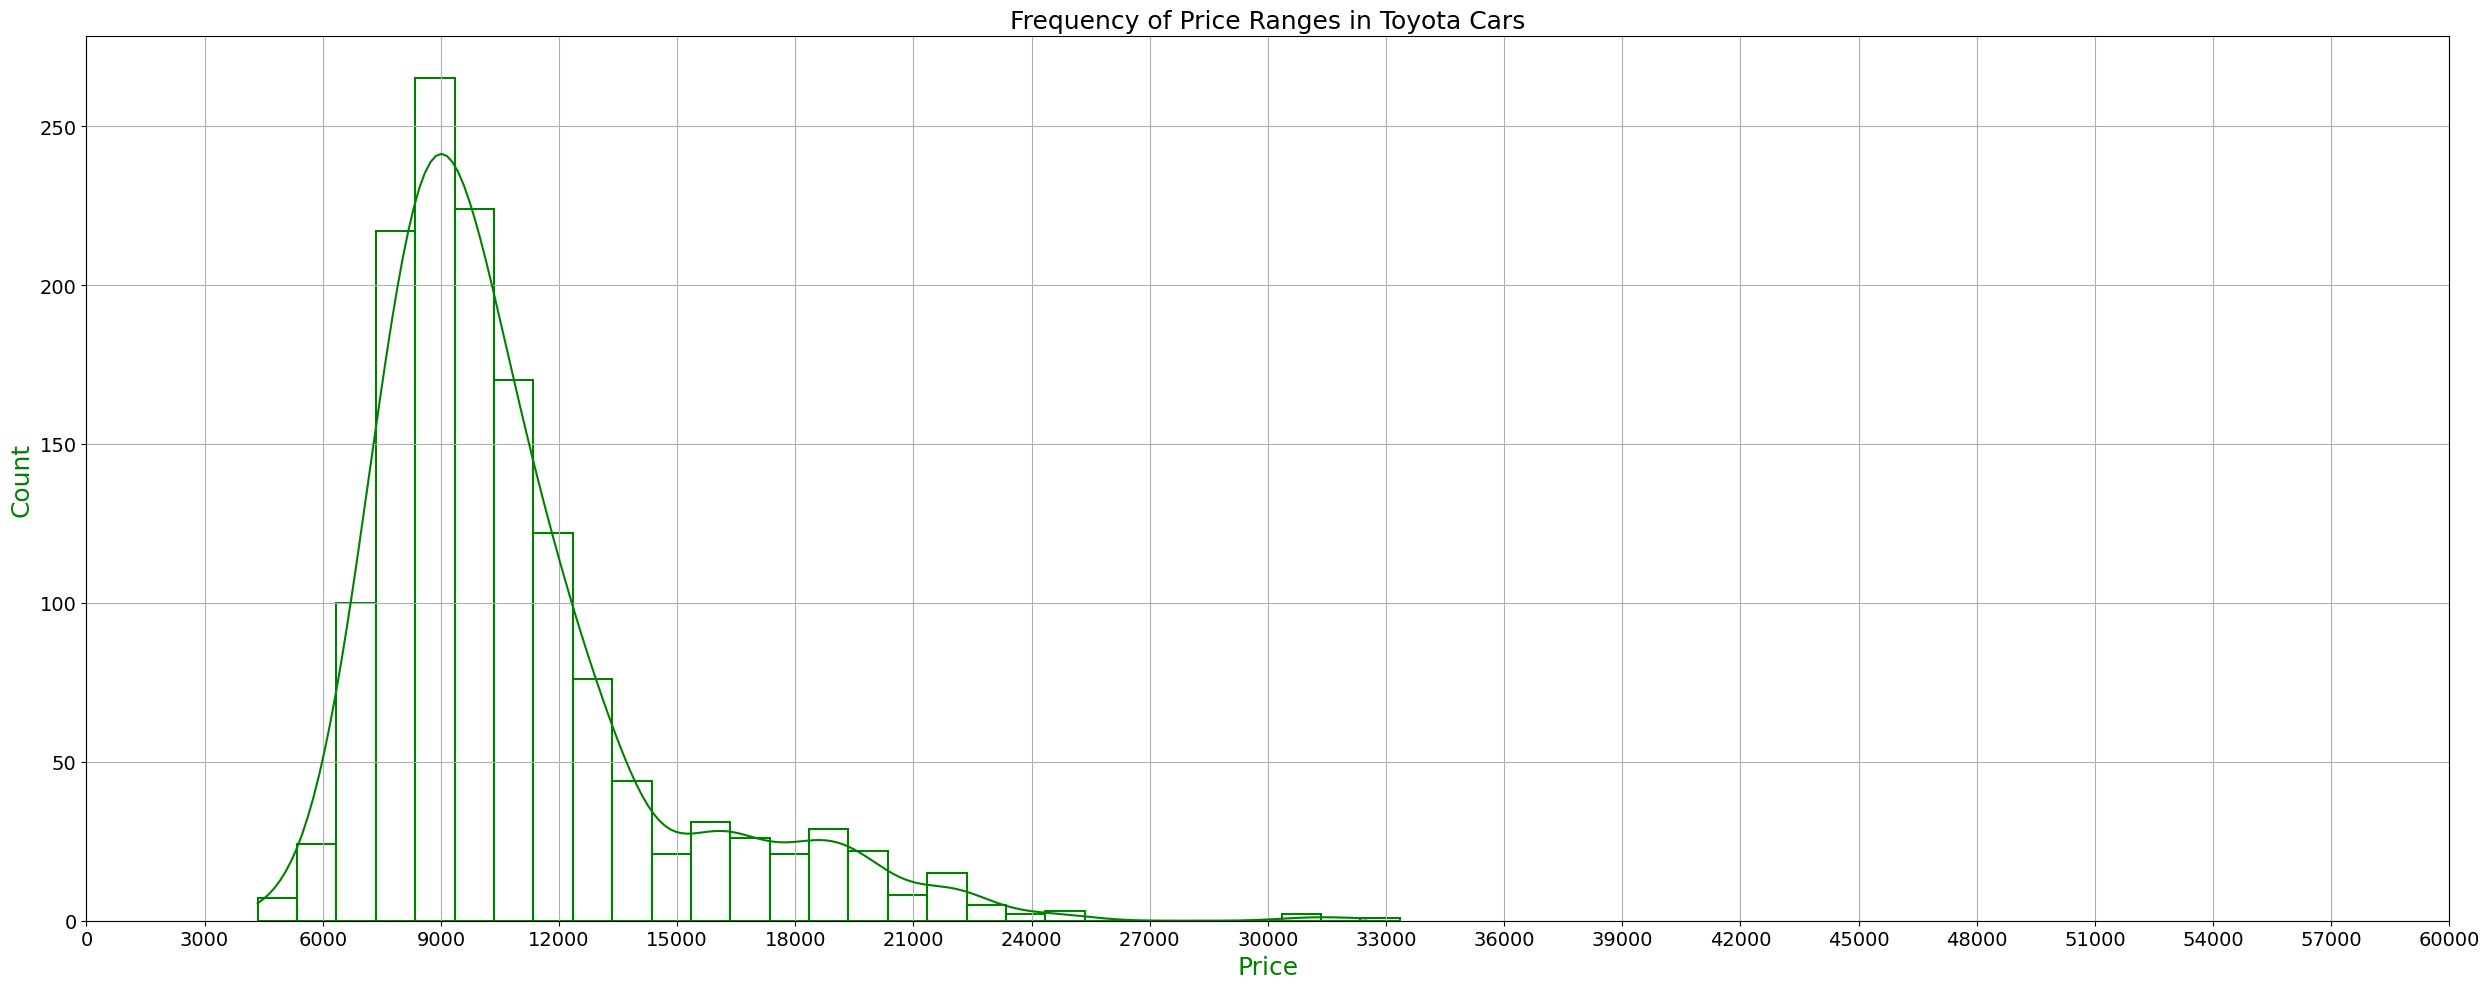

In [27]:
#Histogram
plt.figure(figsize=(25,10))
sns.histplot(x="Price", data=data2, binwidth=1000, kde=True, color="green", fill=False)
plt.title("Frequency of Price Ranges in Toyota Cars", fontsize=18)
plt.xticks(np.arange(0,60001,3000), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Price", fontsize=18, color='green')
plt.ylabel("Count", fontsize=18, color='green')
plt.grid()
plt.tight_layout()
plt.show()

Histogram observations

The KDE curve shows positive skew where the median or peak is visible on the left side.  
Most cars belong to the price range of 7,000-10,000, where the median value 9,000 also lies.  

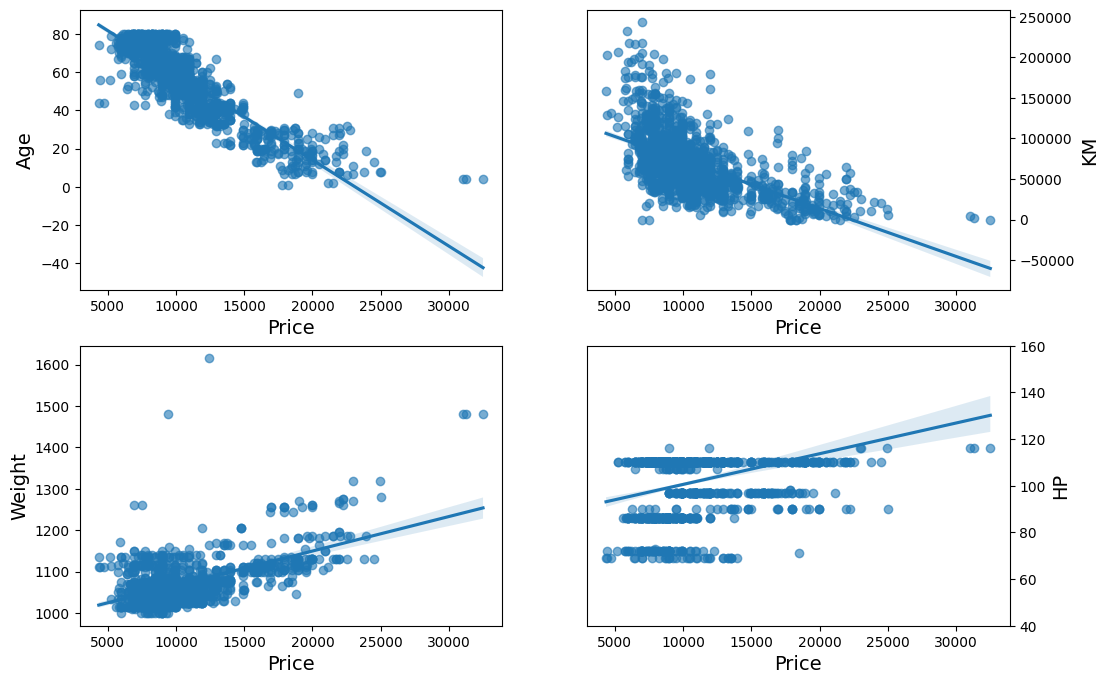

In [28]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Price', y = 'Age', data = data2, scatter_kws={'alpha':0.6}, ax = axes[0,0])
axes[0,0].set_xlabel('Price', fontsize=14)
axes[0,0].set_ylabel('Age', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.regplot(x = 'Price', y = 'KM', data = data2, scatter_kws={'alpha':0.6}, ax = axes[0,1])
axes[0,1].set_xlabel('Price', fontsize=14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

sns.regplot(x = 'Price', y = 'Weight', data = data2, scatter_kws={'alpha':0.6}, ax = axes[1,0])
axes[1,0].set_xlabel('Price', fontsize=14)
axes[1,0].set_ylabel('Weight', fontsize=14)

sns.regplot(x = 'Price', y = 'HP', data = data2, scatter_kws={'alpha':0.6}, ax = axes[1,1])
axes[1,1].set_xlabel('Price', fontsize=14)
axes[1,1].set_ylabel('HP', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()
axes[1,1].set(ylim=(40,160))

plt.show()

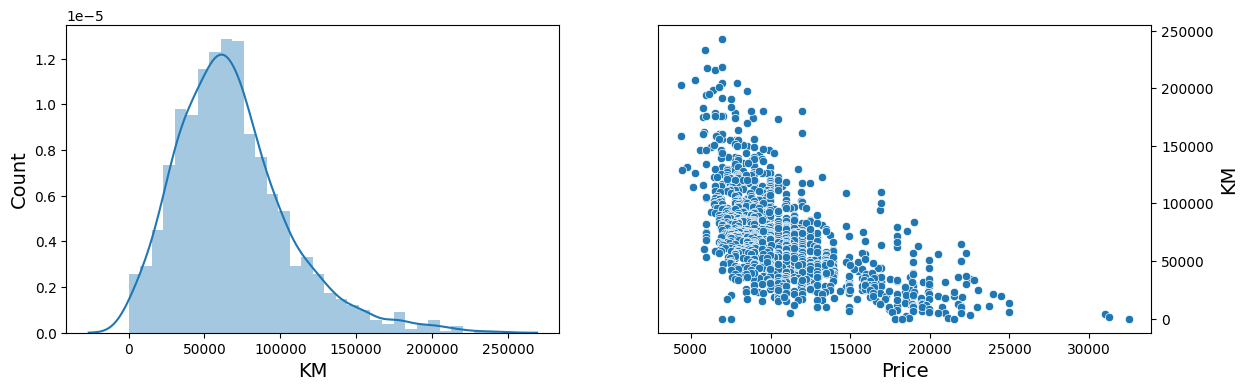

In [29]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data2['KM'], ax = axes[0])
axes[0].set_xlabel('KM', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'Price', y = 'KM', data = data2, ax = axes[1])
axes[1].set_xlabel('Price', fontsize=14)
axes[1].set_ylabel('KM', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

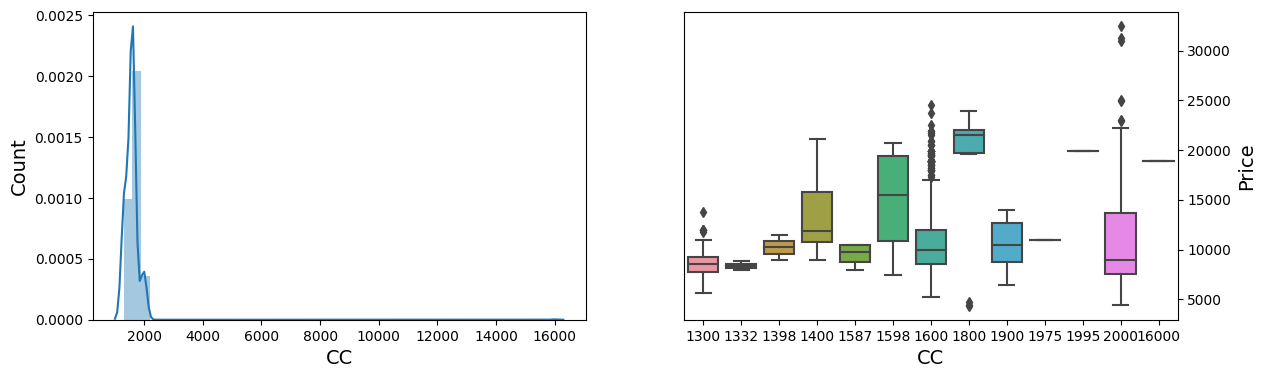

In [30]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data2['CC'], ax = axes[0])
axes[0].set_xlabel('CC', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'CC', y = 'Price', data = data2, ax = axes[1])
axes[1].set_xlabel('CC', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

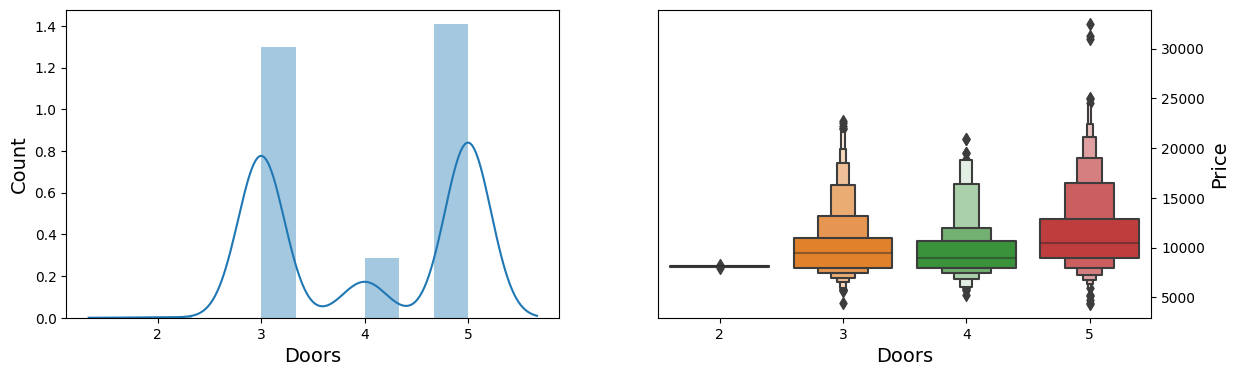

In [31]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data2['Doors'], ax = axes[0])
axes[0].set_xlabel('Doors', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'Doors', y = 'Price', data = data2, ax = axes[1])
axes[1].set_xlabel('Doors', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

Text(0, 0.5, 'Price')

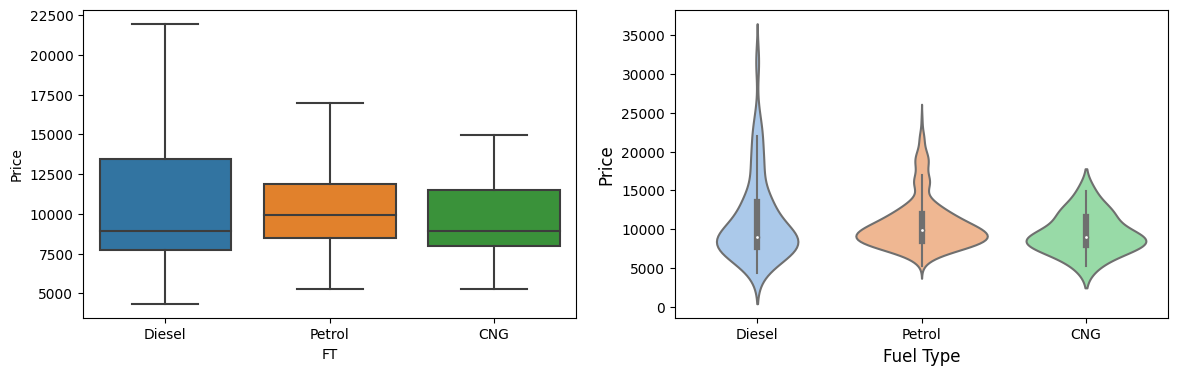

In [32]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.boxplot(y = "Price", data=data2, showfliers=False, x="FT", ax = axes[0])
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.violinplot(y = "Price", data=data2, showfliers=False, x="FT", palette=sns.color_palette('pastel'), ax = axes[1])
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Price", fontsize=12)


Boxplot Observations  
Even though the price range of "Other" is much wider than "Petrol", their medians are very close (9000-10000)  
Toyota models running on Petrol are the most affordable  
Cars running on Hybrid fuel come in the most versatile price range  

Violinplot Observations

Petrol cars in the dataset have the highest density around the price point of 8000  
All models seem to have a substantial density around the price range of 8,000-10,000  

**Correlation Matrix**

In [33]:
data2.corr(numeric_only=True)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.317014,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.157380,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.333425,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.317014,-0.157380,-0.333425,1.000000,0.035884,0.090139,0.209429,-0.299526,0.090543
CC,0.124375,-0.096549,0.103822,0.035884,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.090139,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209429,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.299526,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.090543,0.335077,0.301734,0.021238,0.621988,1.000000


Price has moderate relationship with Age,KM,Weight variables (moderate relationship = 0.5 to 0.8)  
Price has weak relationship with HP,CC,Doors,Gears,QT (weak relationship <0.5)

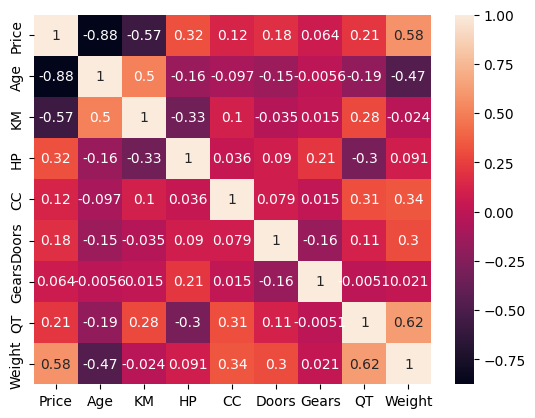

In [34]:
#heatmap for toyota
sns.heatmap(data2.corr(numeric_only= True),annot=True)
plt.show()

Correlation between Categorical variable (Fuel Type) with target variable(Price)

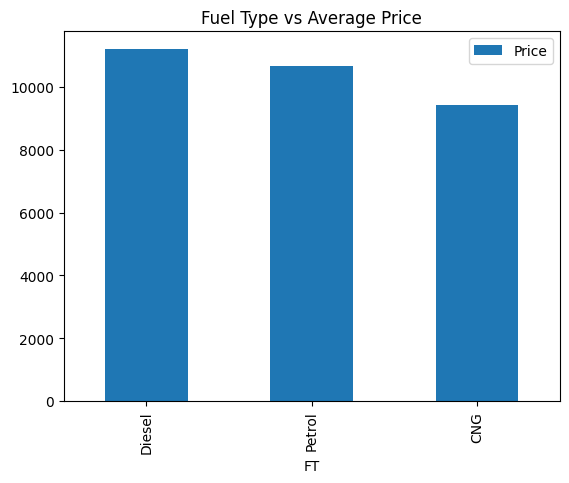

In [35]:
df = pd.DataFrame(data2.groupby(['FT'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

**Scatterplot between the variables along with histogram**

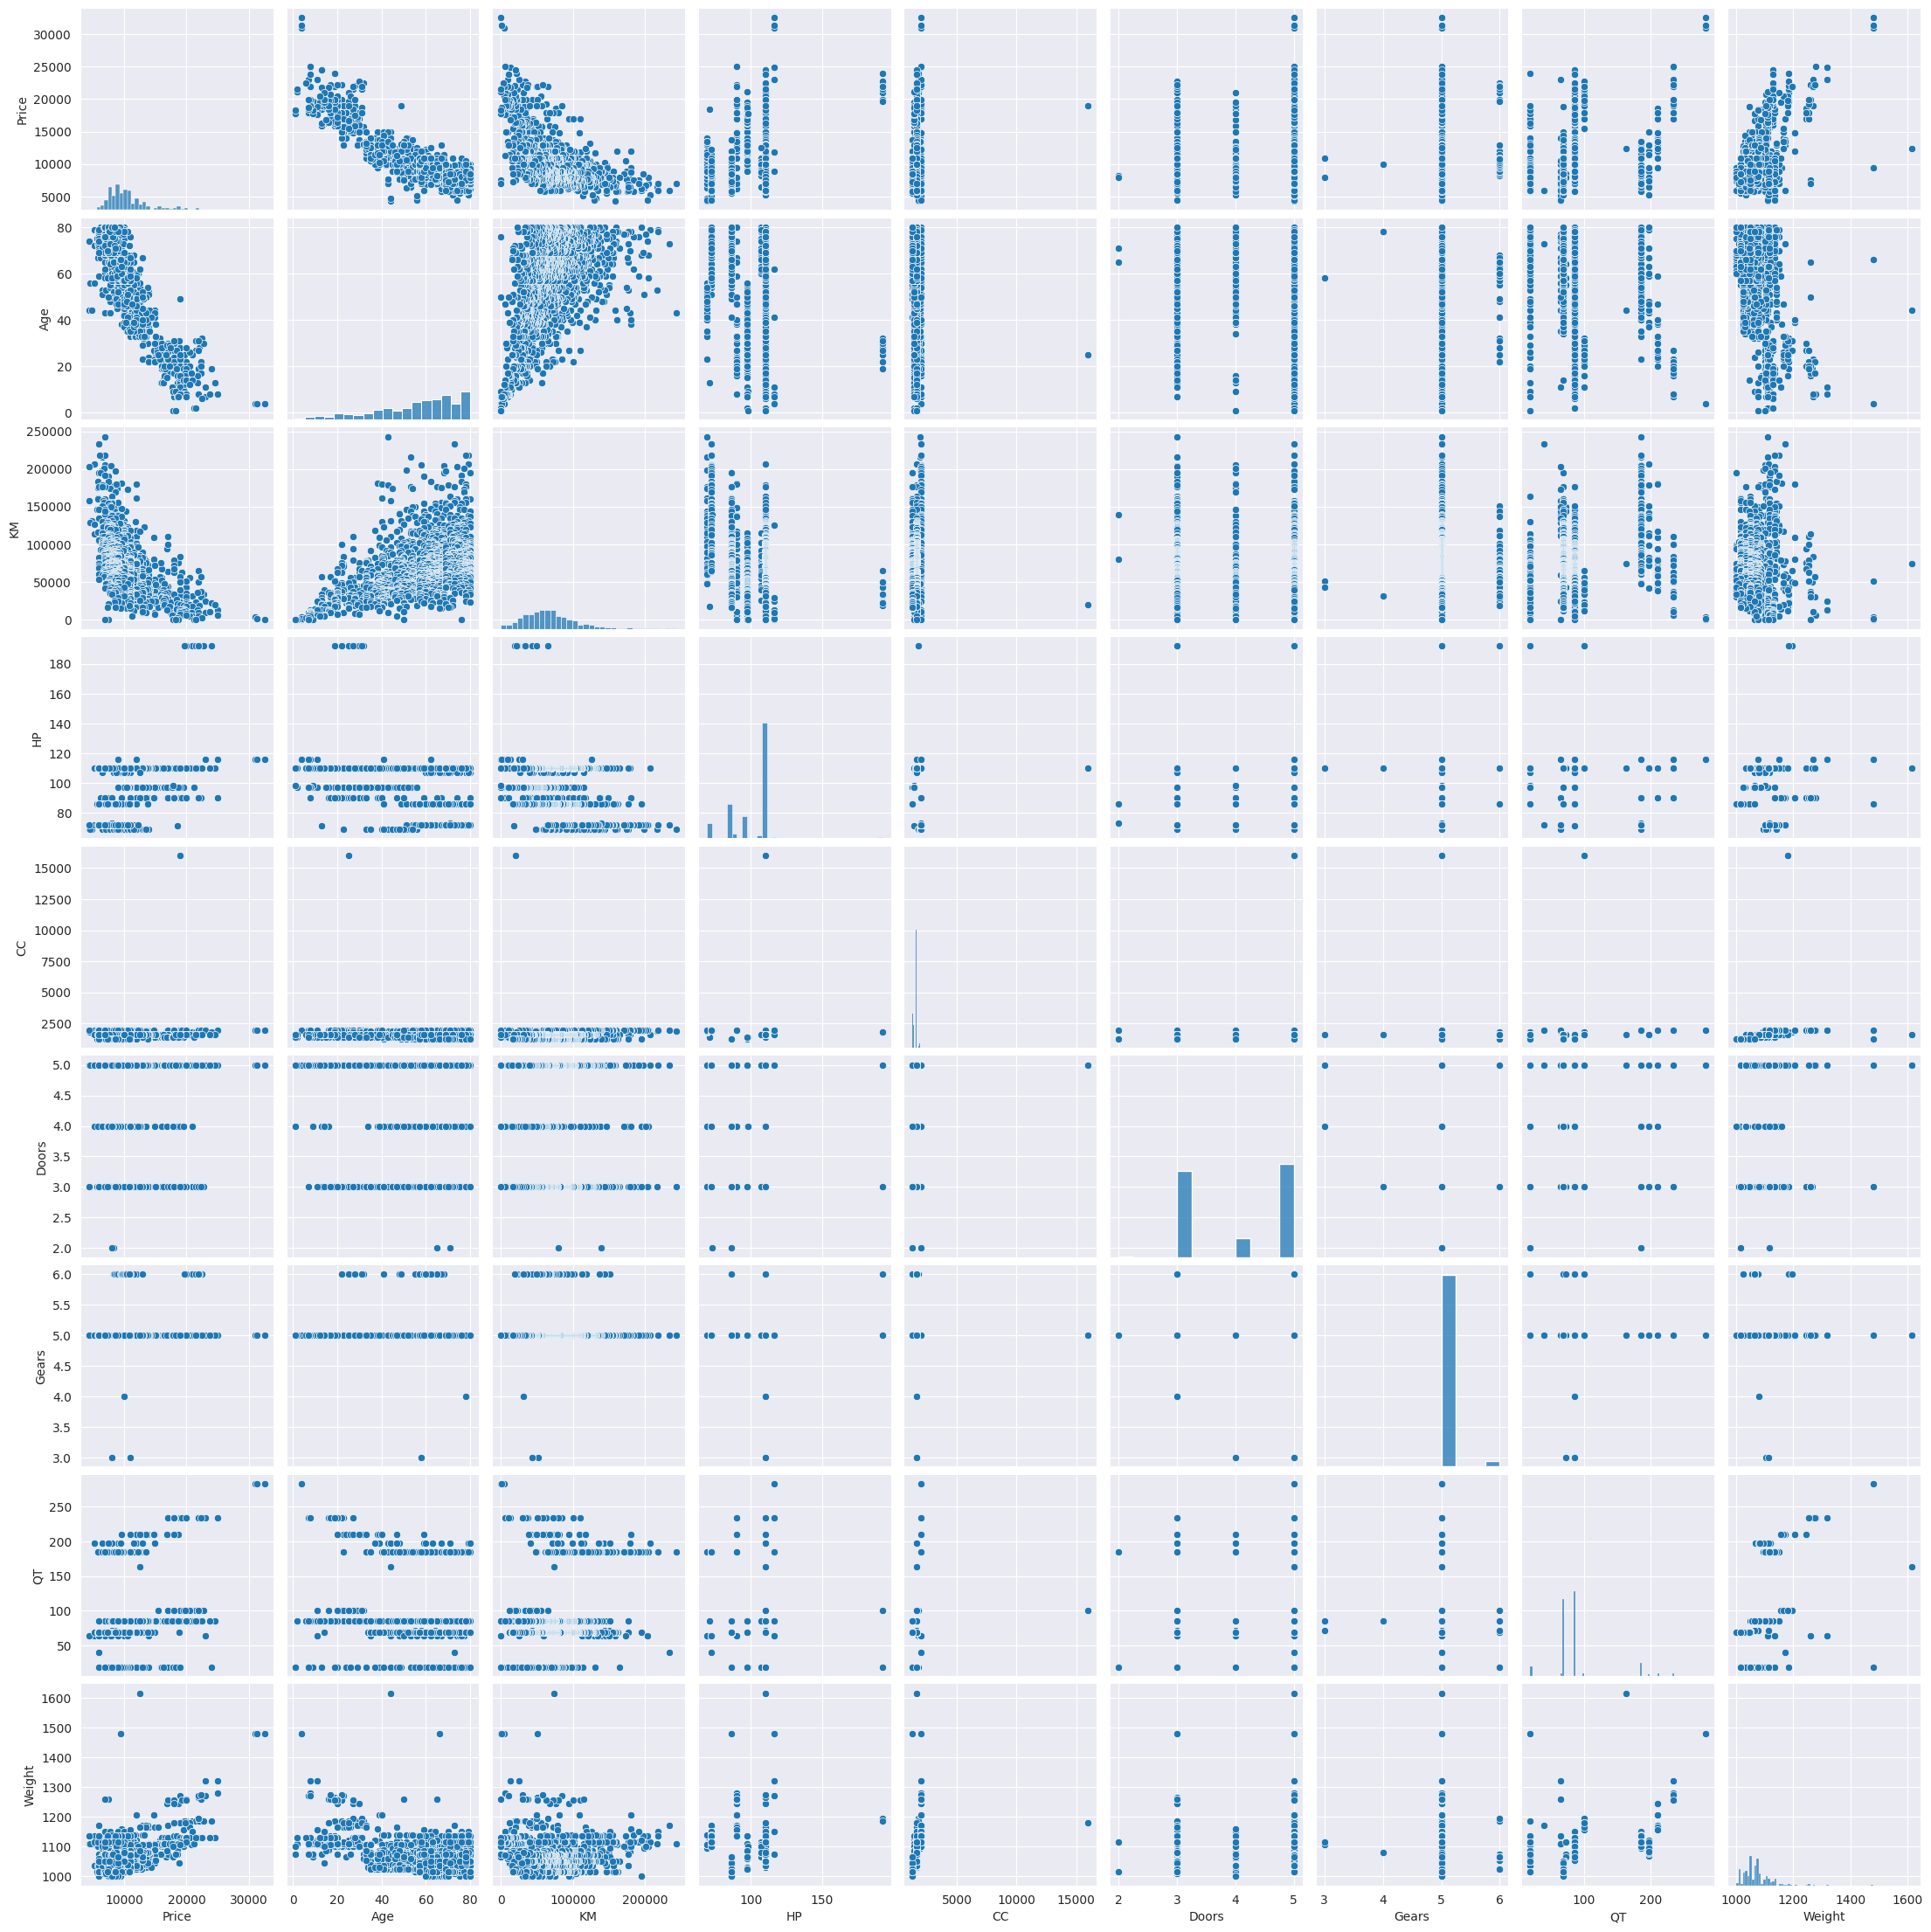

In [36]:
#Linearity check
#format the plot backgroung and scatter plots for all the variables
sns.set_style(style= 'darkgrid')
sns.pairplot(data2)

Price is negatively related with Age,KM variables, the line is downward.

**Converting categorical values to numeric values**  
Dummy Variable is a method in which categorical data is get converted to numerical data (1 and 0) Below, FT(Fuel type) column has three different categorical data Diesel, Petrol and CNG.

In [37]:
data3 = pd.get_dummies(data2,columns=['FT'],dtype=int)
data3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,FT_CNG,FT_Diesel,FT_Petrol
0,13500,23,46986,90.0,2000,3,5,210,1165,0,1,0
1,13750,23,72937,90.0,2000,3,5,210,1165,0,1,0
2,13950,24,41711,90.0,2000,3,5,210,1165,0,1,0
3,14950,26,48000,90.0,2000,3,5,210,1165,0,1,0
4,13750,30,38500,90.0,2000,3,5,210,1170,0,1,0


### Data Preparation

Machine Learning Task:  
Task is Regression (As target variable is numerical)

**Independent variables** - Age, KM, HP, CC, Gears, Doors, QT, Weight, FT_CNG, FT_Petrol, FT_Diesel  
**Target variable** - Price

In [38]:
X = data3.drop('Price', axis = 1).values
y = data3.iloc[:, 0].values.reshape(-1,1)

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [40]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1076, 11)
Shape of y_train:  (1076, 1)
Shape of X_test:  (359, 11)
Shape of y_test (359, 1)


### Regression models

**Linear Regression**

In [41]:
from sklearn.linear_model import LinearRegression
#define the model
regressor_linear = LinearRegression()
#fit the model
regressor_linear.fit(X_train, y_train)

LinearRegression()

**Cross validation and Model evaluation metrics**

In [42]:
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear)))

print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7379495071459263
R2_score (train):  0.8745019356368079
R2_score (test):  0.8432015672042665
RMSE:  1432.8076100464962


**Decision Tree Regression**

In [43]:
from sklearn.tree import DecisionTreeRegressor
#define the model
regressor_dt = DecisionTreeRegressor(random_state = 0)
# Fitting the Decision Tree Regression Model to the dataset(Train the decision tree regressor)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

**Cross validation and Model evaluation metrics**

In [44]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))

print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8251486819400642
R2_score (train):  0.999998568748919
R2_score (test):  0.8571618347274812
RMSE:  1367.5372105665435


**Random Forest Regression**

In [45]:
from sklearn.ensemble import RandomForestRegressor
#define the model
regressor_rf = RandomForestRegressor(n_estimators = 1200, random_state = 0)
# Fitting the Random Forest Regression to the dataset
model_rf= regressor_rf.fit(X_train, y_train.ravel())
model_rf

RandomForestRegressor(n_estimators=1200, random_state=0)

**Cross validation and Model evaluation metrics**

In [46]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))

print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8991473366839837
R2_score (train):  0.9871482349506253
R2_score (test):  0.9053593605736987
RMSE:  1113.1555440746


**Compare Models**

In [47]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [48]:
compare = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
compare

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,1432.807610,0.874502,0.843202,0.737950
1,Decision Tree Regression,1367.537211,0.999999,0.857162,0.825149
2,Random Forest Regression,1113.155544,0.987148,0.905359,0.899147


The Random Forest model has the lowest RMSE, indicating it makes the most accurate predictions among the models we used. By combining the multiple trees, random forest regression reduces the reliance on any one tree, leading to less overfitting on the training data. Averaging predictions from multiple trees often results in more accurate predictions than a single decision tree.

**Visualizing Models Performance**

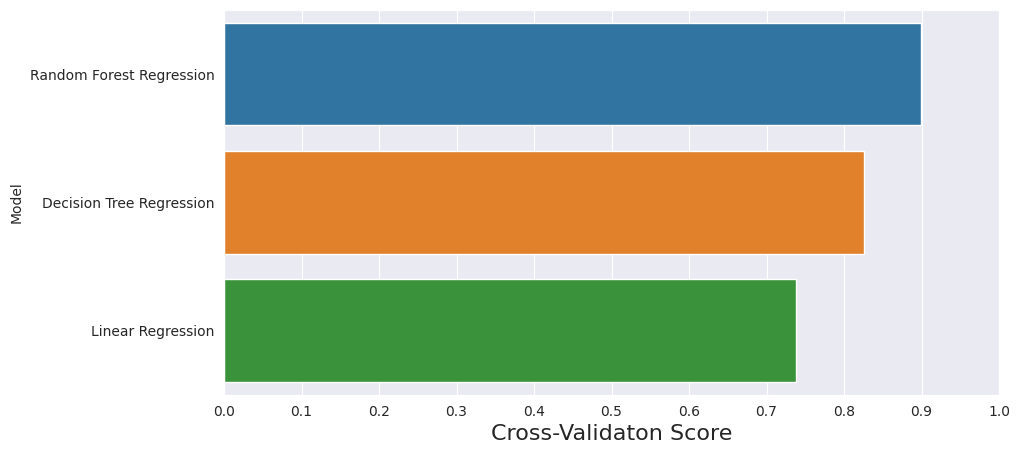

In [49]:
f, axe = plt.subplots(1,1, figsize=(10,5))

compare.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = compare, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

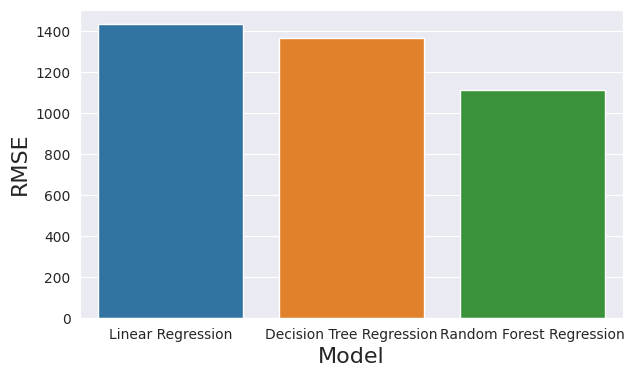

In [50]:
compare.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(7,4))
sns.barplot(x='Model', y='RMSE', data=compare, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

From the above results, we can see that Random Forest model gives the best R² value and less RMSE value. Hence this model can be selected as our final model and used for predicting the price.

**Using the model for new data**

In [51]:
#Predict for new data
newdata= {'Age':[20,25,15],'KM':[45678,25972,72438],'FT':["Diesel","Petrol","CNG"],'HP':[90,86,110],'CC':[2000,1800,1300],'Doors':[3,4,5],'Gears':[5,6,5],'QT':[69,94,210],'Weight':[1025,1100,1250]}

In [52]:
data_pred= pd.DataFrame(newdata,columns=['Age','KM','FT','HP','CC','Doors','Gears','QT','Weight'])
data_pred

,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
0,20,45678,Diesel,90,2000,3,5,69,1025
1,25,25972,Petrol,86,1800,4,6,94,1100
2,15,72438,CNG,110,1300,5,5,210,1250


In [53]:
data_pred1 = pd.get_dummies(data_pred,columns=['FT'],dtype=int)
data_pred1.head()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,FT_CNG,FT_Diesel,FT_Petrol
0,20,45678,90,2000,3,5,69,1025,0,1,0
1,25,25972,86,1800,4,6,94,1100,0,0,1
2,15,72438,110,1300,5,5,210,1250,1,0,0


In [54]:
new_pred = model_rf.predict(data_pred1)
data_pred1['Pred_Price']=np.round(new_pred,2)
data_pred1

,Age,KM,HP,CC,Doors,Gears,QT,Weight,FT_CNG,FT_Diesel,FT_Petrol,Pred_Price
0,20,45678,90,2000,3,5,69,1025,0,1,0,15128.00
1,25,25972,86,1800,4,6,94,1100,0,0,1,15513.50
2,15,72438,110,1300,5,5,210,1250,1,0,0,19750.89
